In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys
import os
import seaborn
from  matplotlib import pyplot

In [2]:
def plot_time_dependence(path):
    df_data = pd.read_csv(f"{path}", index_col=None)
    
#     df_data = df_data[df_data['r/a'].isin(space_sizes)]
    fg = seaborn.FacetGrid(data=df_data, height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'temperature', 'functional', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'/home/ilya/soft/source/culgt/SA_test'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/SA_test'
    fg.savefig(image_path, dpi=400)
    plt.show()

In [ ]:
plot_time_dependence('/home/ilya/soft/source/culgt/SA_test/data/SA_transition/SA_transition_nt6_0501')
plot_time_dependence('/home/ilya/soft/source/culgt/SA_test/data/SA_transition/SA_transition_nt8_0601')
plot_time_dependence('/home/ilya/soft/source/culgt/SA_test/data/SA_transition/SA_transition_nt10_0501')
plot_time_dependence('/home/ilya/soft/source/culgt/SA_test/data/SA_transition/SA_transition_nt12_0501')
plot_time_dependence('/home/ilya/soft/source/culgt/SA_test/data/SA_transition/SA_transition_nt14_0501')

In [ ]:
print((0.05/(0.665-0.648))/((0.489-0.411)/(1.2-0.8)))

In [ ]:
for i in range(501, 509):
    print(i)
    plot_time_dependence(f'/home/ilya/soft/source/culgt/SA_test/data/SA_test_{i:04}')

In [3]:
def plot_functional(path):
    df_data = pd.read_csv(path)
    
#     df_data = df_data[df_data['r/a'].isin(space_sizes)]
    fg = seaborn.FacetGrid(data=df_data, height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'copy', 'functional', marker="o", fmt='', linestyle = '').add_legend()

def plot_functional_average(paths, start, end, name, copy_max1, copy_max2):
    data = []
    for path in paths:
        for i in range(start, end + 1):
            data_path = f'{path[0]}/{name}_{i:04}'
            if(os.path.isfile(data_path)):
                data.append(pd.read_csv(data_path))
                data[-1]['num'] = i
                data[-1]['type'] = path[1]
    
    df2 = pd.DataFrame(columns=['copy_max', 'functional_aver', 'type'])
    df_data = pd.concat(data)
    df2 = []
    for copy_max in df_data['copy'].unique():
        df_data1 = df_data[df_data['copy'] <= copy_max]
        groupby1 = df_data1.groupby(['num', 'type'])['functional'].max()
        df2.append(groupby1.groupby('type')\
                   .agg([('functional', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index())
        df2[-1]['copy_max'] = copy_max
        
    
    df2 = pd.concat(df2)
    
    fg = seaborn.FacetGrid(data=df2, hue='type', height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'copy_max', 'functional', 'std', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'/home/ilya/soft/source/culgt/SA_test'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/SA_copies'
    fg.savefig(image_path, dpi=400)
    plt.show()
    
def plot_time_functional(paths, start, end, name, copy_max1, copy_max2):
    data = []
    for path in paths:
        for i in range(start, end + 1):
            data_path = f'{path[0]}/{name}_{i:04}'
            if(os.path.isfile(data_path)):
                data.append(pd.read_csv(data_path))
                data[-1]['num'] = i
                data[-1]['type'] = path[1]
                data[-1]['time'] = path[2]
                data[-1]['copy max'] = path[3]
                data[-1]['copy'] = data[-1]['copy'] - 1

    df2 = pd.DataFrame(columns=['copy_max', 'functional_aver', 'type', 'time'])
    df_data = pd.concat(data)
    df2 = []
    for copy_max in range(copy_max2):
        df1 = df_data[df_data['copy max'] > copy_max]
        df1 = df1[df1['copy'] <= copy_max]
        df1 = df1.groupby(['num', 'type', 'time'])['functional'].max()
        df2.append(df1.groupby(['type', 'time'])\
                   .agg([('functional', np.mean), ('std', lambda x: np.std(x, ddof=1)/math.sqrt(np.size(x)))]).reset_index())
        df2[-1]['copy_max'] = copy_max + 1
        df2[-1]['time'] = df2[-1]['time'] * (copy_max + 1)
        
    
    df2 = pd.concat(df2)
    
    # df2 = df2[df2['time'] <= 50]
    
    fg = seaborn.FacetGrid(data=df2, hue='type', height=5, aspect=1.61)
#     plt.xscale('log')
    fg.map(plt.errorbar, 'time', 'functional', 'std', marker="o", fmt='', linestyle = '').add_legend()
    
    image_path = f'/home/ilya/soft/source/culgt/SA_test'
    try:
        os.makedirs(image_path)
    except:
        pass
    
    image_path = f'{image_path}/SA_copies'
    #fg.savefig(image_path, dpi=400)
    plt.show()

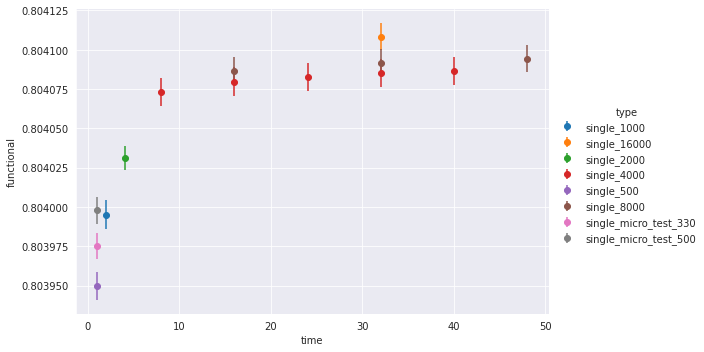

In [46]:
path1 = '/home/ilya/soft/source/culgt/SA_test/data/nt10/test'
paths = [(f'{path1}/SP_steps_4000/copies=10', 'single_4000', 8, 10), (f'{path1}/SP_steps_8000/copies=5', 'single_8000', 16, 5), \
        (f'{path1}/SP_steps_16000/copies=5', 'single_16000', 32, 5), (f'{path1}/SP_steps_32000/copies=5', 'single_32000', 64, 5),\
        (f'/home/ilya/soft/source/culgt/SA_test/data/nt10/SP_steps_500', 'single_500', 1, 1),\
        (f'/home/ilya/soft/source/culgt/SA_test/data/nt10/SP_steps_1000', 'single_1000', 2, 1),\
        (f'/home/ilya/soft/source/culgt/SA_test/data/nt10/SP_steps_2000', 'single_2000', 4, 1),\
        (f'/home/ilya/soft/source/culgt/SA_test/data/nt10/microupdates_test/SP_steps_500/copies=1', 'single_micro_test_500', 1, 1),\
        (f'/home/ilya/soft/source/culgt/SA_test/data/nt10/microupdates_test/SP_steps_330/copies=1', 'single_micro_test_330', 1, 1)]
plot_time_functional(paths, 501, 550, 'SA', 0, 5)

In [ ]:
for i in range(501, 510):
    plot_functional(f'/home/ilya/soft/source/culgt/SA_test/data/SA_test_{i:04}')

In [ ]:
path1 = '/home/ilya/soft/source/culgt/SA_test/data'
paths = [(f'{path1}/steps_1500_therm-steps_10', '1500_10'), (f'{path1}/single_steps_3000_therm-steps_5', 'single_3000_5'), (f'{path1}/double_steps_3000_therm-steps_5', 'double_3000_5'), (f'{path1}/single_steps_1500_therm-steps_5', 'single_1500_5'), (f'{path1}/single_steps_6000_therm-steps_5', 'single_6000_5'), (f'{path1}/single_steps_8000_therm-steps_5', 'single_8000_5')]
plot_functional_average(paths, 501, 508, 0, 20)

In [ ]:
path1 = '/home/ilya/soft/source/culgt/SA_test/data'
paths = [(f'{path1}/single_steps_8000_therm-steps_5', 'single_8000_5'), (f'{path1}/single_steps_6000_therm-steps_5', 'single_6000_5')]
plot_functional_average(paths, 501, 550, 0, 20)

In [ ]:
path1 = '/home/ilya/soft/source/culgt/SA_test/data/nt10'
paths = [(f'{path1}/single_steps_8000_therm-steps_5', 'single_8000'), (f'{path1}/single_steps_4000_therm-steps_5', 'single_4000')]
plot_functional_average(paths, 501, 550, 0, 10)

In [ ]:
path1 = '/home/ilya/soft/source/culgt/SA_test/data/nt10/test'
paths = [(f'{path1}/SP_steps_4000/copies=10', 'single_4000'), (f'{path1}/SP_steps_8000/copies=5', 'single_8000'), \
        (f'{path1}/SP_steps_16000/copies=5', 'single_16000'), (f'{path1}/SP_steps_32000/copies=5', 'single_32000'),\
        (f'{path1}/double/DP_steps_4000/copies=10', 'double_4000'), (f'{path1}/double/DP_steps_8000/copies=5', 'double_8000')]
plot_functional_average(paths, 501, 550, 0, 10)

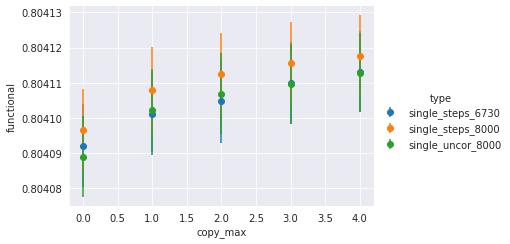

In [13]:
path1 = '/home/ilya/soft/source/culgt/SA_test/data/nt10/test'
path2 = '/home/ilya/soft/source/culgt/SA_test/data/nt10'
paths = [(f'{path2}/steps_test1/SP_steps_6730/copies=5', 'single_steps_6730'), (f'{path2}/steps_test/SP_steps_8000/copies=5', 'single_steps_8000'),\
        (f'{path2}/uncorrelated/SP_steps_8000/copies=5', 'single_uncor_8000')]
plot_functional_average(paths, 501, 1100, 'SA', 0, 10)

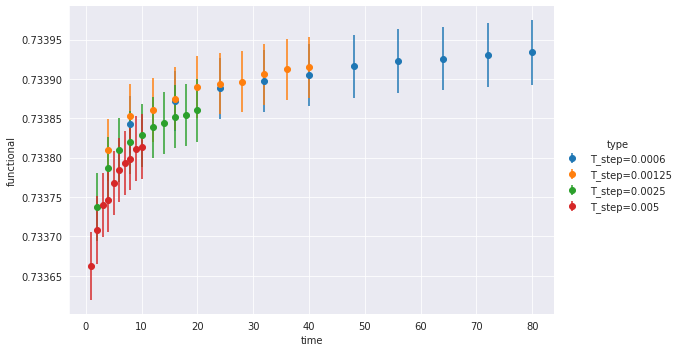

In [4]:
path1 = '/home/ilya/soft/lattice/observables/result/mag/su2/su2_suzuki/24^4/beta2.4'
paths = [(f'{path1}/T_step=0.005/T_final=0.005/OR_steps=6/functionals', 'T_step=0.005', 1, 10), (f'{path1}/T_step=0.0025/T_final=0.0025/OR_steps=6/functionals', 'T_step=0.0025', 2, 10),
        (f'{path1}/T_step=0.00125/T_final=0.00125/OR_steps=6/functionals', 'T_step=0.00125', 4, 10), (f'{path1}/T_step=0.0006/T_final=0.0006/OR_steps=6/functionals', 'T_step=0.0006', 8, 10)]
plot_time_functional(paths, 1, 50, 'functional', 0, 10)

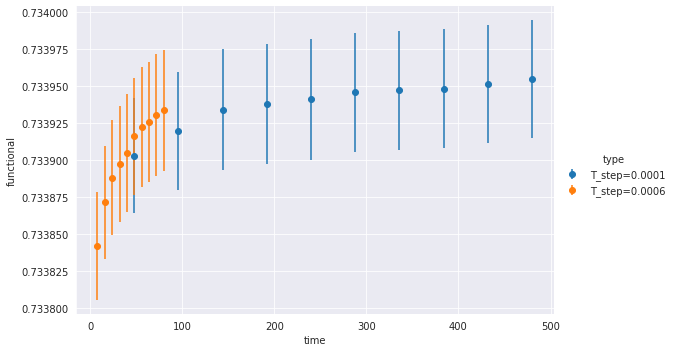

In [55]:
path1 = '/home/ilya/soft/lattice/observables/result/mag/su2/su2_suzuki/24^4/beta2.4'
paths = [(f'{path1}/T_step=0.0006/T_final=0.0006/OR_steps=6/functionals', 'T_step=0.0006', 8, 10),(f'{path1}/T_step=0.0001/T_final=0.0001/OR_steps=6/functionals', 'T_step=0.0001', 48, 10)]
plot_time_functional(paths, 1, 50, 'functional', 0, 10)

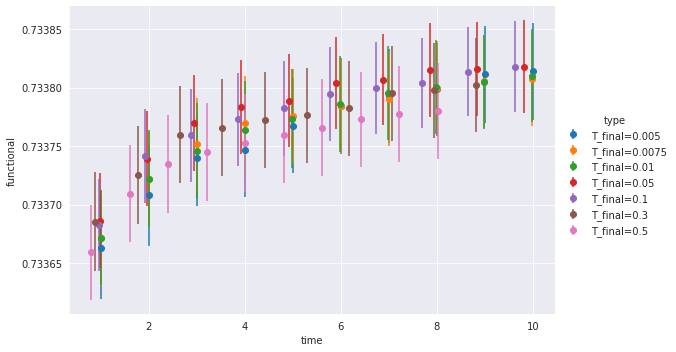

In [64]:
def calculation_time(T_final):
    return (2.5 - T_final)/0.005/((2.5 - 0.005)/0.005)

path1 = '/home/ilya/soft/lattice/observables/result/mag/su2/su2_suzuki/24^4/beta2.4'
paths = [(f'{path1}/T_step=0.005/T_final=0.005/OR_steps=6/functionals', 'T_final=0.005', 1, 10), (f'{path1}/T_step=0.005/T_final=0.0075/OR_steps=6/functionals', 'T_final=0.0075', calculation_time(0.0075), 10),
        (f'{path1}/T_step=0.005/T_final=0.01/OR_steps=6/functionals', 'T_final=0.01', calculation_time(0.01), 10), (f'{path1}/T_step=0.005/T_final=0.05/OR_steps=6/functionals', 'T_final=0.05', calculation_time(0.05), 10),
        (f'{path1}/T_step=0.005/T_final=0.1/OR_steps=6/functionals', 'T_final=0.1', calculation_time(0.1), 10), (f'{path1}/T_step=0.005/T_final=0.3/OR_steps=6/functionals', 'T_final=0.3', calculation_time(0.3), 10),
        (f'{path1}/T_step=0.005/T_final=0.5/OR_steps=6/functionals', 'T_final=0.5', calculation_time(0.5), 10)]
plot_time_functional(paths, 1, 50, 'functional', 0, 10)

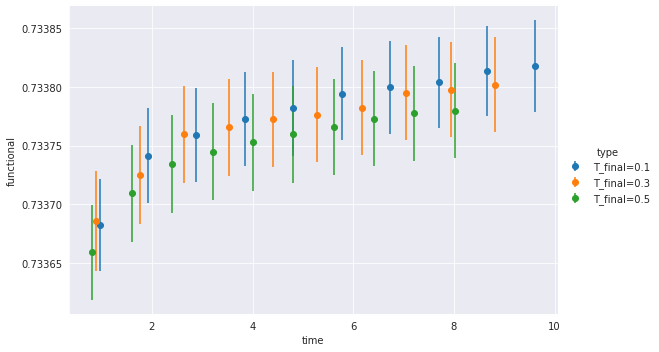

In [67]:
def calculation_time(T_final):
    return (2.5 - T_final)/0.005/((2.5 - 0.005)/0.005)

path1 = '/home/ilya/soft/lattice/observables/result/mag/su2/su2_suzuki/24^4/beta2.4'
paths = [(f'{path1}/T_step=0.005/T_final=0.1/OR_steps=6/functionals', 'T_final=0.1', calculation_time(0.1), 10), (f'{path1}/T_step=0.005/T_final=0.3/OR_steps=6/functionals', 'T_final=0.3', calculation_time(0.3), 10),
        (f'{path1}/T_step=0.005/T_final=0.5/OR_steps=6/functionals', 'T_final=0.5', calculation_time(0.5), 10)]
plot_time_functional(paths, 1, 50, 'functional', 0, 10)

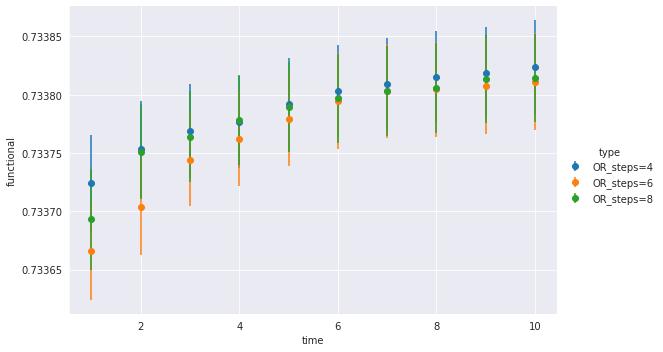

In [63]:
path1 = '/home/ilya/soft/lattice/observables/result/mag/su2/su2_suzuki/24^4/beta2.4'
paths = [(f'{path1}/T_step=0.005/T_final=0.005/OR_steps=6/functionals', 'OR_steps=6', 1, 10), (f'{path1}/T_step=0.00375/T_final=0.00375/OR_steps=4/functionals', 'OR_steps=4', 1, 10),
        (f'{path1}/T_step=0.00625/T_final=0.00625/OR_steps=8/functionals', 'OR_steps=8', 1, 10)]
plot_time_functional(paths, 1, 50, 'functional', 0, 10)